In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re

In [2]:
fileName = 'state & Field Tracker/cCalRecycle_NorthBranch_DataManagerTicketExport.xlsx'

In [3]:
df = pd.read_excel(fileName)

In [4]:
df.columns.to_list()

['Ticket Number',
 'Crew Number',
 'Load Date',
 'Ticket Date',
 'Start Time',
 'End Time',
 'GPSNorth',
 'GPSWest',
 'Is Void',
 'Ticket Notes',
 'Disposal Monitor Number',
 'Disposal Monitor Name',
 'Zone Name',
 'GIS Zone1',
 'GIS Zone2',
 'GIS Zone3',
 'GIS Zone4',
 'GIS Zone5',
 'Contractor Name',
 'Service Code',
 'Measurement',
 'Unit Count',
 'Addr No',
 'Addr St',
 'ROENumber']

# Get rid of any discrepancies in the servie code column
some 8A have an extra space, or an '  for example

In [5]:
 spec_chars = ["!", '"', "#", "%", "&", "'", "(", ")",
                  "*", "+", ",", "-", ".", "/", ":", ";", "<",
                  "=", ">", "?", "@", "[", "\\", "]", "^", "_",
                  "`", "{", "|", "}", "~", "–"]
for char in spec_chars:
    df['Service Code'] = df['Service Code'].str.replace(char, " ", regex=True)
# take away empyt spaces    
df['Service Code'] = df['Service Code'].str.split().str.join(" ")

# What is needed:
* 8A = sum all 8A tickets
* 8AA = sum only all VAILD 8AA tickets. monitor name != CALRECYCLE* any that do is invalid.

# Ticket day adjustment
We need only the date and not the time for the ticket dates

In [6]:
df['Ticket Date'] = df['Ticket Date'].dt.date

Should make ticket date and object now as well

In [7]:
df['Ticket Date'].dtypes

dtype('O')

# variable conditions


In [8]:
monitorName = ('CALRECYCLE','CALRECYCLE CALRECYCLE')
serviceCodes = ('8A', '8AA')

In [9]:
df2 = df
df2 = df2[(df2['Is Void'] != True) & (df2['Service Code'].isin(serviceCodes)) & (~df2['Disposal Monitor Name'].isin(monitorName))]

In [10]:
d3 = df2[['Service Code', 'GIS Zone1', 'Unit Count','Ticket Date']].groupby(['GIS Zone1', 'Service Code','Ticket Date']).sum()

In [17]:
d4 = df2[['Service Code', 'GIS Zone1', 'Unit Count','Ticket Date']].groupby(['Ticket Date']).sum()

In [40]:
d3.to_excel('Text dates.xlsx')

In [ ]:
d4.head()

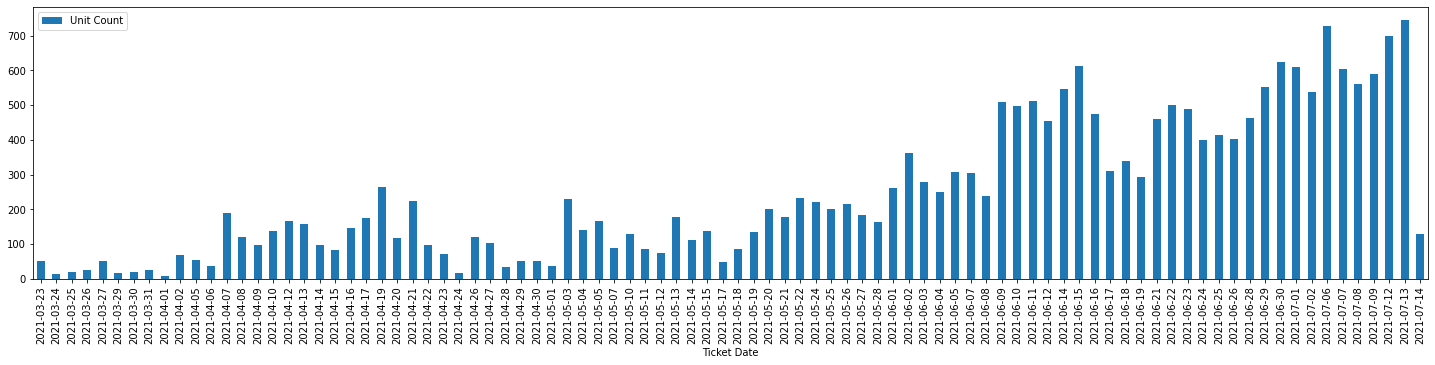

In [35]:
d4.plot(kind='bar', figsize=(25,5))
# plt.savefig('test.png', dpi=100)

# plot graph with numbers:


In [39]:
d4.head(50)

,Unit Count
Ticket Date,
2021-03-23,50.0
2021-03-24,15.0
2021-03-25,19.0
2021-03-26,26.0
2021-03-27,50.0
2021-03-29,16.0
2021-03-30,19.0
2021-03-31,25.0
2021-04-01,9.0
